In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from dython.nominal import associations

In [2]:
df_rating = pd.read_csv("data/full_restaurant_rating_data.csv")

In [3]:
df_rating.columns

Index(['name', 'address', 'region', 'latitude', 'longitude',
       'nearby_attraction', 'distance_from_attraction', 'price_category',
       'price_range', 'mon_operating_hours', 'tue_operating_hours',
       'wed_operating_hours', 'thu_operating_hours', 'fri_operating_hours',
       'sat_operating_hours', 'sun_operating_hours', 'is_travellors_choice',
       'is_michellin', 'about', 'list_of_meals', 'list_of_cuisines',
       'list_of_features', 'list_of_special_diets', 'num_of_reviews',
       'num_of_rating_1', 'num_of_rating_2', 'num_of_rating_3',
       'num_of_rating_4', 'num_of_rating_5', 'food_rating', 'service_rating',
       'value_rating', 'atmosphere_rating', 'overall_rating', 'url'],
      dtype='object')

### 1. Exploratory Data Analysis - Nearby Attraction

Looking at the various nearby attraction that exist in the dataset

#### 1.1 Proportion of Nearby Attraction

In [4]:
nearby_attraction_count = df_rating['nearby_attraction'].value_counts(dropna=False)
nearby_attraction_fig = px.pie(nearby_attraction_count, names=nearby_attraction_count.index, values='nearby_attraction', width=800, height=400)
nearby_attraction_fig.show()

#### 1.2 Proportion of Nearby Attraction [Excluding Null]

In [5]:
nearby_attraction_count = df_rating['nearby_attraction'].value_counts()
nearby_attraction_fig = px.pie(nearby_attraction_count, names=nearby_attraction_count.index, values='nearby_attraction', width=800, height=400)
nearby_attraction_fig.show()

#### 1.3 Mean Overall Rating across Nearby Attractions

In [6]:
sub_df = df_rating[['nearby_attraction', 'overall_rating']].copy()

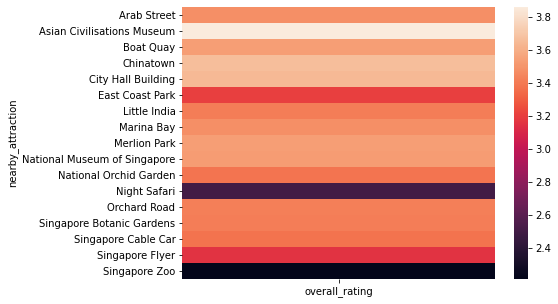

In [7]:
fig, ax = plt.subplots(figsize=(7,5))
df_heatmap = sub_df.pivot_table(values='overall_rating',columns='nearby_attraction', aggfunc=np.mean)
ax = sns.heatmap(df_heatmap.transpose())

#### 1.4 Median Overall Rating across Nearby Attractions

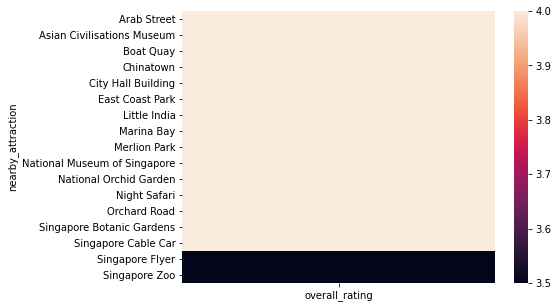

In [8]:
fig, ax = plt.subplots(figsize=(7,5))
df_heatmap = sub_df.pivot_table(values='overall_rating',columns='nearby_attraction',aggfunc=np.median)
ax = sns.heatmap(df_heatmap.transpose())

#### 1.5 Percentage of restaurants with particular rating out of restaurants with that nearby attraction
- row-wise

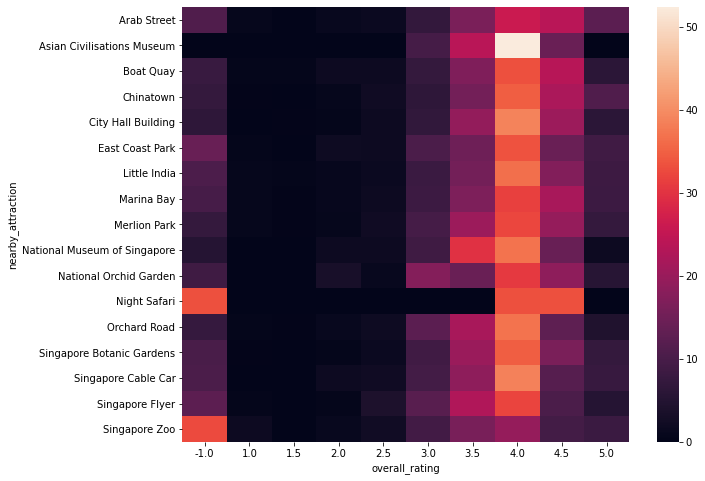

In [9]:
fig, ax = plt.subplots(figsize=(10,8))
rating_nearby_count = df_rating.groupby(['overall_rating', 'nearby_attraction'])['url'].count()
nearby_count = df_rating.groupby(['nearby_attraction'])['url'].count()
df_heatmap = (rating_nearby_count.div(nearby_count, level='nearby_attraction') * 100).unstack(fill_value=0)
ax = sns.heatmap(df_heatmap.transpose())

#### 1.6 Percentage of restaurants with particular nearby attraction out of restaurants with that rating
- column-wise

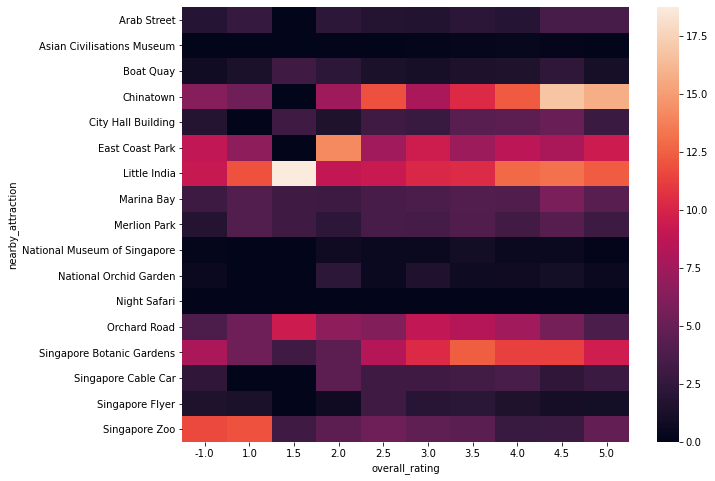

In [10]:
fig, ax = plt.subplots(figsize=(10,8))
rating_nearby_count = df_rating.groupby(['overall_rating', 'nearby_attraction'])['url'].count()
nearby_count = df_rating.groupby(['overall_rating'])['url'].count()
df_heatmap = (rating_nearby_count.div(nearby_count, level='overall_rating') * 100).unstack(fill_value=0)
ax = sns.heatmap(df_heatmap.transpose())

#### 1.7 Number of restaurants by nearby attraction and by rating

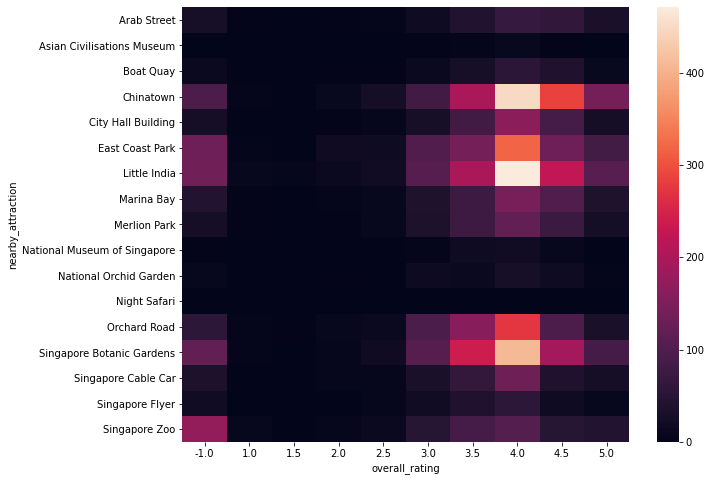

In [11]:
fig, ax = plt.subplots(figsize=(10,8))
df_heatmap = df_rating.groupby(['overall_rating', 'nearby_attraction'])['url'].count().unstack(fill_value=0)
ax = sns.heatmap(df_heatmap.transpose())

### 2. Exploratory Data Analysis - Nearby Attraction [Grouped]

Looking at the various nearby attraction that exist in the dataset after grouping

#### 2.1 Count of restaurants by nearby attraction 

In [4]:
df_rating.groupby(['nearby_attraction'])['url'].count()

nearby_attraction
Arab Street                      257
Asian Civilisations Museum        21
Boat Quay                        165
Chinatown                       1290
City Hall Building               424
East Coast Park                  948
Little India                    1293
Marina Bay                       455
Merlion Park                     370
National Museum of Singapore      57
National Orchid Garden            91
Night Safari                       3
Orchard Road                     741
Singapore Botanic Gardens       1181
Singapore Cable Car              342
Singapore Flyer                  175
Singapore Zoo                    530
Name: url, dtype: int64

Grouping
- 'Asian Civilisations Museum', 'National Museum of Singapore', 'City Hall Building' to 'Museum'
- 'National Orchid Garden', 'Singapore Botanic Gardens' to 'Garden'
- 'Singapore Cable Car', 'Singapore Flyer' to 'Observation'
- 'Night Safari', 'Singapore Zoo' to 'Wildlife'

In [11]:
bucket_df = df_rating.copy()
bucket_df["grouped_nearby_attraction"] = bucket_df['nearby_attraction'].replace(to_replace =['Asian Civilisations Museum', 'National Museum of Singapore', 'City Hall Building'], value ="Museum")
bucket_df["grouped_nearby_attraction"] = bucket_df['grouped_nearby_attraction'].replace(to_replace =['National Orchid Garden', 'Singapore Botanic Gardens'], value ="Garden")
bucket_df["grouped_nearby_attraction"] = bucket_df['grouped_nearby_attraction'].replace(to_replace =['Singapore Cable Car', 'Singapore Flyer'], value ="Observation")
bucket_df["grouped_nearby_attraction"] = bucket_df['grouped_nearby_attraction'].replace(to_replace =['Night Safari', 'Singapore Zoo'], value ="Wildlife")

#### 2.2 Count of restaurants by nearby attraction after grouping

In [12]:
bucket_df.groupby(['grouped_nearby_attraction'])['url'].count()

grouped_nearby_attraction
Arab Street         257
Boat Quay           165
Chinatown          1290
East Coast Park     948
Garden             1272
Little India       1293
Marina Bay          455
Merlion Park        370
Museum              502
Observation         517
Orchard Road        741
Wildlife            533
Name: url, dtype: int64

#### 2.3 Proportion of Grouped Nearby Attraction 

In [14]:
nearby_attraction_count = bucket_df['grouped_nearby_attraction'].value_counts(dropna=False)
nearby_attraction_fig = px.pie(nearby_attraction_count, names=nearby_attraction_count.index, values='grouped_nearby_attraction', width=800, height=400)
nearby_attraction_fig.show()

#### 2.4 Proportion of Grouped Nearby Attraction [Excluding Null]

In [15]:
nearby_attraction_count = bucket_df['grouped_nearby_attraction'].value_counts()
nearby_attraction_fig = px.pie(nearby_attraction_count, names=nearby_attraction_count.index, values='grouped_nearby_attraction', width=800, height=400)
nearby_attraction_fig.show()

#### 2.5 Mean Overall Rating across Grouped Nearby Attractions

In [16]:
sub_df = bucket_df[['grouped_nearby_attraction', 'overall_rating']].copy()

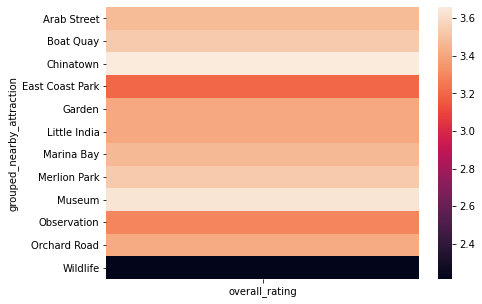

In [17]:
fig, ax = plt.subplots(figsize=(7,5))
df_heatmap = sub_df.pivot_table(values='overall_rating',columns='grouped_nearby_attraction', aggfunc=np.mean)
ax = sns.heatmap(df_heatmap.transpose())

#### 2.6 Median Overall Rating across Grouped Nearby Attractions

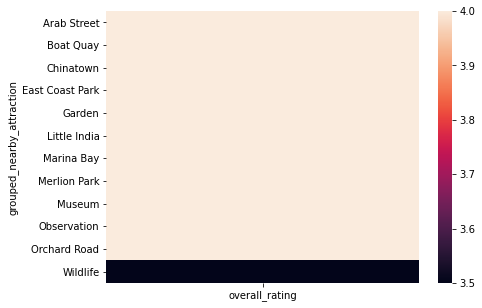

In [18]:
fig, ax = plt.subplots(figsize=(7,5))
df_heatmap = sub_df.pivot_table(values='overall_rating',columns='grouped_nearby_attraction',aggfunc=np.median)
ax = sns.heatmap(df_heatmap.transpose())

#### 2.7 Percentage of restaurants with particular rating out of restaurants with that grouped nearby attraction
- row-wise

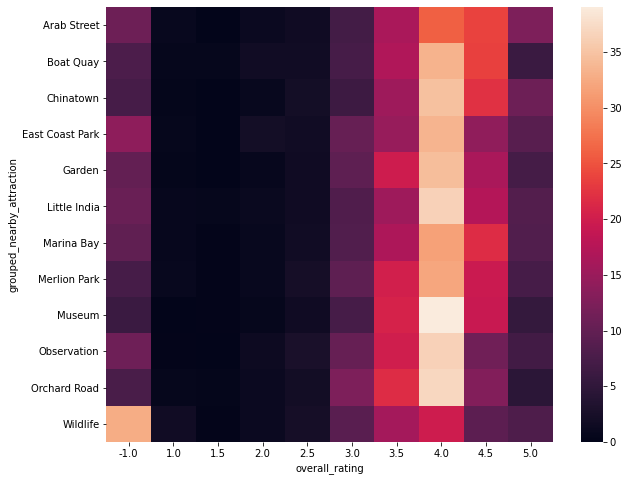

In [19]:
fig, ax = plt.subplots(figsize=(10,8))
rating_nearby_count = bucket_df.groupby(['overall_rating', 'grouped_nearby_attraction'])['url'].count()
nearby_count = bucket_df.groupby(['grouped_nearby_attraction'])['url'].count()
df_heatmap = (rating_nearby_count.div(nearby_count, level='grouped_nearby_attraction') * 100).unstack(fill_value=0)
ax = sns.heatmap(df_heatmap.transpose())

#### 2.8 Percentage of restaurants with particular grouped nearby attraction out of restaurants with that rating
- column-wise

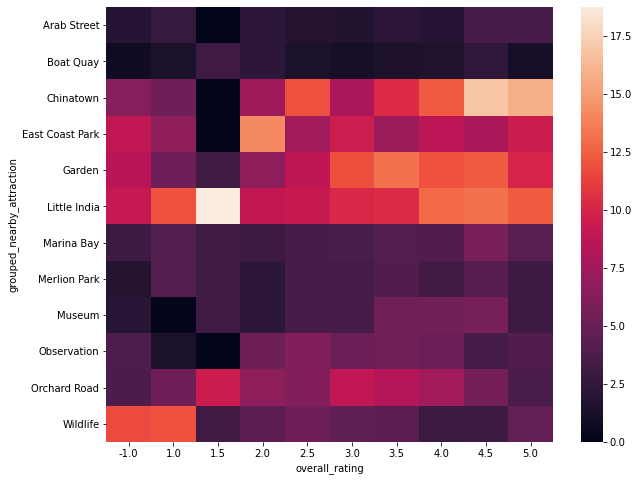

In [20]:
fig, ax = plt.subplots(figsize=(10,8))
rating_nearby_count = bucket_df.groupby(['overall_rating', 'grouped_nearby_attraction'])['url'].count()
nearby_count = bucket_df.groupby(['overall_rating'])['url'].count()
df_heatmap = (rating_nearby_count.div(nearby_count, level='overall_rating') * 100).unstack(fill_value=0)
ax = sns.heatmap(df_heatmap.transpose())

#### 2.8 Number of restaurants by grouped nearby attraction and by rating

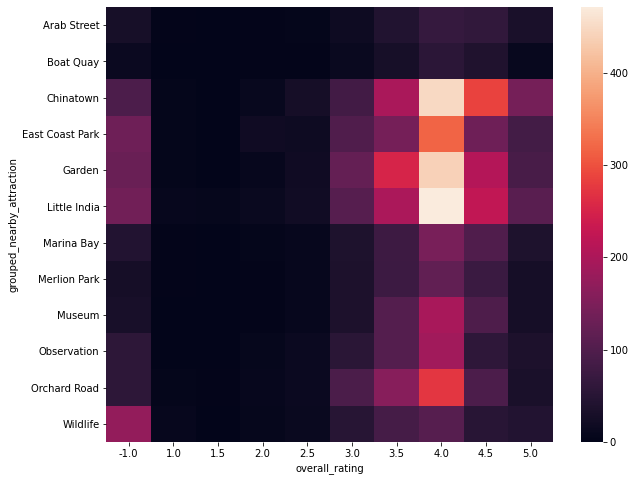

In [21]:
fig, ax = plt.subplots(figsize=(10,8))
df_heatmap = bucket_df.groupby(['overall_rating', 'grouped_nearby_attraction'])['url'].count().unstack(fill_value=0)
ax = sns.heatmap(df_heatmap.transpose())

### 3. Feature Engineering
#### 3.0 Check feasibility of feature cross: Grouped Nearby Attraction, Distance From Attraction

In [23]:
# group nearby attractions together, same as what is done in cell above except change in column name
bucket_df = df_rating.copy()
bucket_df["nearby_attraction"] = bucket_df['nearby_attraction'].replace(to_replace =['Asian Civilisations Museum', 'National Museum of Singapore', 'City Hall Building'], value ="Museum")
bucket_df["nearby_attraction"] = bucket_df['nearby_attraction'].replace(to_replace =['National Orchid Garden', 'Singapore Botanic Gardens'], value ="Garden")
bucket_df["nearby_attraction"] = bucket_df['nearby_attraction'].replace(to_replace =['Singapore Cable Car', 'Singapore Flyer'], value ="Observation")
bucket_df["nearby_attraction"] = bucket_df['nearby_attraction'].replace(to_replace =['Night Safari', 'Singapore Zoo'], value ="Wildlife")

In [24]:
bucket_df['nearby_attraction'] = bucket_df['nearby_attraction'].str.replace(" ", "_")
bucket_df['nearby_attraction'] = bucket_df['nearby_attraction'].str.lower()

In [25]:
# too little samples in each grouped_nearby_attraction X distance_from_attraction pairing
bucket_df.groupby(['nearby_attraction', 'distance_from_attraction']).agg({'url': 'count'})

url
nearby_attraction distance_from_attraction     
arab_street       0.0                        18
                  0.1                        25
                  0.2                        25
                  0.3                        28
                  0.4                        13
...                                         ...
wildlife          6.8                         3
                  6.9                         2
                  7.0                         8
                  7.1                         1
                  7.8                         3

[336 rows x 1 columns]

In [26]:
# look at min, max, median 
bucket_df.groupby(['nearby_attraction'], dropna=False).agg({'distance_from_attraction': ['min', 'max', 'median']})

distance_from_attraction            
                                       min  max median
nearby_attraction                                     
arab_street                            0.0  2.8   0.50
boat_quay                              0.2  0.7   0.40
chinatown                              0.0  2.2   0.50
east_coast_park                        0.3  6.9   2.25
garden                                 0.0  5.8   2.30
little_india                           0.0  3.1   0.90
marina_bay                             0.1  2.0   0.60
merlion_park                           0.0  1.1   0.60
museum                                 0.0  0.9   0.40
observation                            0.0  4.2   0.90
orchard_road                           0.0  2.3   0.40
wildlife                               0.0  7.8   5.40
NaN                                    NaN  NaN    NaN

In [27]:
# count by nearby attraction
bucket_df.groupby(['nearby_attraction'], dropna=False)['url'].count()

nearby_attraction
arab_street         257
boat_quay           165
chinatown          1290
east_coast_park     948
garden             1272
little_india       1293
marina_bay          455
merlion_park        370
museum              502
observation         517
orchard_road        741
wildlife            533
NaN                2818
Name: url, dtype: int64

#### 3.1 Feature cross: Grouped Nearby Attraction, Above Median Distance From Attraction

In [28]:
median_by_attraction = bucket_df.groupby(['nearby_attraction']).agg({'distance_from_attraction': ['min', 'max', 'median']})['distance_from_attraction']['median'].to_dict()
bucket_df["above_median"] =  bucket_df[['distance_from_attraction', 'nearby_attraction']].apply(lambda x: x['distance_from_attraction'] > median_by_attraction[x['nearby_attraction']] if not pd.isna(x['nearby_attraction']) else np.nan, axis=1)
bucket_df["above_median"] = bucket_df["above_median"].astype(float)

In [29]:
bucket_df["above_median"].unique()

array([ 1.,  0., nan])

In [30]:
# count by nearby attraction and above median distance
bucket_df.groupby(['nearby_attraction', 'above_median']).agg({'url': 'count'})

url
nearby_attraction above_median     
arab_street       0.0           192
                  1.0            65
boat_quay         0.0            94
                  1.0            71
chinatown         0.0           807
                  1.0           483
east_coast_park   0.0           474
                  1.0           474
garden            0.0           641
                  1.0           631
little_india      0.0           710
                  1.0           583
marina_bay        0.0           341
                  1.0           114
merlion_park      0.0           265
                  1.0           105
museum            0.0           271
                  1.0           231
observation       0.0           281
                  1.0           236
orchard_road      0.0           412
                  1.0           329
wildlife          0.0           288
                  1.0           245

In [31]:
from sklearn.preprocessing import OneHotEncoder # categorical variable so do one hot encoding
nearby_attraction_enc = OneHotEncoder(categories='auto')
# One hot encoding for categorical variable
features_nearby_attraction_train = nearby_attraction_enc.fit_transform(bucket_df[['nearby_attraction']])

# TODO transform on test

In [33]:
nearby_attraction_ohe_columns = nearby_attraction_enc.get_feature_names_out(['nearby_attraction'])
nearby_attraction_ohe_df = pd.DataFrame(features_nearby_attraction_train.toarray(), columns=nearby_attraction_ohe_columns)
bucket_ohe_df = pd.concat([bucket_df.drop(['nearby_attraction'], axis=1), nearby_attraction_ohe_df], axis=1)

In [34]:
nearby_attraction_ohe_columns

array(['nearby_attraction_arab_street', 'nearby_attraction_boat_quay',
       'nearby_attraction_chinatown', 'nearby_attraction_east_coast_park',
       'nearby_attraction_garden', 'nearby_attraction_little_india',
       'nearby_attraction_marina_bay', 'nearby_attraction_merlion_park',
       'nearby_attraction_museum', 'nearby_attraction_observation',
       'nearby_attraction_orchard_road', 'nearby_attraction_wildlife',
       'nearby_attraction_nan'], dtype=object)

In [35]:
cross_cols = []
bucket_ohe_df["above_median"] = bucket_ohe_df["above_median"].replace(np.nan, 0)
for col in nearby_attraction_ohe_columns:
    if col == 'nearby_attraction_nan':
        continue
    cross = col + "_above_median"
    bucket_ohe_df[cross] = bucket_ohe_df[col] * bucket_ohe_df["above_median"]
    cross_cols.append(cross)

In [36]:
attraction_eda_cols = []
attraction_eda_cols.extend(cross_cols)
attraction_eda_cols.extend(nearby_attraction_ohe_columns)

#### 3.2 EDA: Using feature cross columns only in Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [38]:
cross_cols

['nearby_attraction_arab_street_above_median',
 'nearby_attraction_boat_quay_above_median',
 'nearby_attraction_chinatown_above_median',
 'nearby_attraction_east_coast_park_above_median',
 'nearby_attraction_garden_above_median',
 'nearby_attraction_little_india_above_median',
 'nearby_attraction_marina_bay_above_median',
 'nearby_attraction_merlion_park_above_median',
 'nearby_attraction_museum_above_median',
 'nearby_attraction_observation_above_median',
 'nearby_attraction_orchard_road_above_median',
 'nearby_attraction_wildlife_above_median']

In [39]:
X = bucket_ohe_df[cross_cols]
y = bucket_ohe_df['overall_rating'].astype(str)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

logreg = LogisticRegression(multi_class='multinomial')

# fit the model with data
logreg.fit(X_train, y_train)

# predict the response for new observations
y_pred_train = logreg.predict(X_train)

# calculate accuracy
print("training accuracy: {}".format(metrics.accuracy_score(y_train, logreg.predict(X_train))))
print("test accuracy: {}".format(metrics.accuracy_score(y_test, logreg.predict(X_test))))

# calculate AUC
print("training AUC: {}".format(metrics.roc_auc_score(y_train, logreg.predict_proba(X_train), multi_class="ovr")))
print("test AUC: {}".format(metrics.roc_auc_score(y_test, logreg.predict_proba(X_test), multi_class="ovr")))

training accuracy: 0.3296296296296296
test accuracy: 0.33679684700824075
training AUC: 0.552749884757217
test AUC: 0.5291743952773803


In [40]:
df = pd.DataFrame(zip(X_train.columns, np.transpose(logreg.coef_)), columns=['features', 'coef']) 
df = pd.concat([df, df.coef.apply(pd.Series).add_prefix('coef_')], axis = 1)
df

,features,coef,coef_0,coef_1,coef_2,coef_3,coef_4,coef_5,coef_6,coef_7,coef_8,coef_9
0,nearby_attraction_arab_street_above_median,"[0.1300465970074931, -0.2750965072225968, -0.1...",0.130047,-0.275097,-0.129331,0.228135,-0.031269,0.083957,-0.281375,-0.171755,0.258254,0.188434
1,nearby_attraction_boat_quay_above_median,"[-0.21015520000251725, -0.29927396112604565, -...",-0.210155,-0.299274,-0.142106,0.181284,0.342905,-0.182559,0.317257,0.035511,0.252278,-0.295141
2,nearby_attraction_chinatown_above_median,"[-0.27121063642302884, -0.8945949856454176, -0...",-0.271211,-0.894595,-0.527367,0.287197,0.242137,-0.158714,0.239274,0.488507,0.401477,0.193294
3,nearby_attraction_east_coast_park_above_median,"[0.43265945145179385, -0.48268776063396585, -0...",0.432659,-0.482688,-0.567501,0.353956,-0.110715,0.233561,-0.087883,0.131794,-0.116829,0.213647
4,nearby_attraction_garden_above_median,"[0.11036933856097578, -0.615972350125356, -0.1...",0.110369,-0.615972,-0.105198,-0.380692,-0.054299,0.495764,0.283981,0.136818,0.042270,0.086959
5,nearby_attraction_little_india_above_median,"[-0.3539180842039819, 0.061368463828510814, 0....",-0.353918,0.061368,0.747929,-0.345369,0.116633,-0.045768,-0.181817,0.032036,0.013079,-0.044173
6,nearby_attraction_marina_bay_above_median,"[-0.2671865694873195, -0.35482377794385733, -0...",-0.267187,-0.354824,-0.172585,0.081343,-0.199486,0.104392,0.429394,0.106243,0.349342,-0.076633
7,nearby_attraction_merlion_park_above_median,"[-0.5360960273101143, -0.3034849983376598, -0....",-0.536096,-0.303485,-0.145095,-0.446068,0.338771,-0.010152,0.725056,0.642862,0.602523,-0.868317
8,nearby_attraction_museum_above_median,"[-0.4745372507483191, -0.5991704819927837, 0.3...",-0.474537,-0.599170,0.363313,0.073721,-0.293407,-0.082543,0.207470,0.453518,0.484890,-0.133254
9,nearby_attraction_observation_above_median,"[-0.29737584303827597, -0.6128727605899972, -0...",-0.297376,-0.612873,-0.328601,0.360919,0.380774,-0.108068,0.115645,0.427693,-0.019676,0.081563


In [41]:
logreg.classes_

array(['-1.0', '1.0', '1.5', '2.0', '2.5', '3.0', '3.5', '4.0', '4.5',
       '5.0'], dtype=object)

#### 3.3 EDA: Using feature cross columns only and nearby_attraction_nan indicator in Logistic Regression

In [48]:
bucket_ohe_df['overall_rating'].unique()

array([ 4. ,  5. ,  4.5,  3.5,  3. ,  2.5,  2. ,  1. ,  1.5, -1. ])

In [42]:
X = bucket_ohe_df[cross_cols + ["nearby_attraction_nan"]]
y = bucket_ohe_df['overall_rating'].astype(str)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

logreg = LogisticRegression(multi_class='multinomial', max_iter=200)

# fit the model with data
logreg.fit(X_train, y_train)

# predict the response for new observations
y_pred_train = logreg.predict(X_train)

# calculate accuracy
print("training accuracy: {}".format(metrics.accuracy_score(y_train, logreg.predict(X_train))))
print("test accuracy: {}".format(metrics.accuracy_score(y_test, logreg.predict(X_test))))

# calculate AUC
print("training AUC: {}".format(metrics.roc_auc_score(y_train, logreg.predict_proba(X_train), multi_class="ovr")))
print("test AUC: {}".format(metrics.roc_auc_score(y_test, logreg.predict_proba(X_test), multi_class="ovr")))

training accuracy: 0.3296296296296296
test accuracy: 0.33679684700824075
training AUC: 0.5878719894527303
test AUC: 0.5665871769477733


In [43]:
df = pd.DataFrame(zip(X_train.columns, np.transpose(logreg.coef_)), columns=['features', 'coef']) 
df = pd.concat([df, df.coef.apply(pd.Series).add_prefix('coef_')], axis = 1)
df

,features,coef,coef_0,coef_1,coef_2,coef_3,coef_4,coef_5,coef_6,coef_7,coef_8,coef_9
0,nearby_attraction_arab_street_above_median,"[0.3894029523992955, -0.24231251781822172, -0....",0.389403,-0.242313,-0.085188,0.293482,0.016772,0.101191,-0.356033,-0.265198,0.043197,0.104687
1,nearby_attraction_boat_quay_above_median,"[0.0403003439201562, -0.26445838257425797, -0....",0.040300,-0.264458,-0.094029,0.248463,0.400948,-0.166835,0.236013,-0.060857,0.033830,-0.373376
2,nearby_attraction_chinatown_above_median,"[-0.012568713431161869, -0.8338872263293909, -...",-0.012569,-0.833887,-0.384027,0.387604,0.300774,-0.163312,0.128092,0.363278,0.142558,0.071490
3,nearby_attraction_east_coast_park_above_median,"[0.6926589010260465, -0.4094222548906227, -0.4...",0.692659,-0.409422,-0.416655,0.454102,-0.056682,0.225050,-0.201912,0.002743,-0.377255,0.087373
4,nearby_attraction_garden_above_median,"[0.36152789953275616, -0.5458749754712856, 0.1...",0.361528,-0.545875,0.126350,-0.296197,-0.006622,0.477742,0.160450,-0.000802,-0.229011,-0.047562
5,nearby_attraction_little_india_above_median,"[-0.11941530604153645, 0.13832917887115984, 1....",-0.119415,0.138329,1.083250,-0.268122,0.153358,-0.077865,-0.320295,-0.121119,-0.273818,-0.194301
6,nearby_attraction_marina_bay_above_median,"[-0.011351935690092059, -0.3150900978121466, -...",-0.011352,-0.315090,-0.115198,0.152654,-0.149532,0.121289,0.345600,0.008319,0.125268,-0.161957
7,nearby_attraction_merlion_park_above_median,"[-0.29335608282697634, -0.26753114299240555, -...",-0.293356,-0.267531,-0.096340,-0.399676,0.399911,0.010169,0.646168,0.549551,0.382712,-0.931607
8,nearby_attraction_museum_above_median,"[-0.22534056079252257, -0.548491612769903, 0.5...",-0.225341,-0.548492,0.524032,0.157534,-0.245993,-0.084772,0.103038,0.333266,0.232761,-0.246034
9,nearby_attraction_observation_above_median,"[-0.03959363017736346, -0.5605141532676683, -0...",-0.039594,-0.560514,-0.229241,0.455413,0.441644,-0.104713,0.015365,0.311939,-0.262825,-0.027474


#### 3.3 EDA: Using feature cross columns and all One-Hot Encoded nearby_attraction columns in Logistic Regression

In [44]:
attraction_eda_cols

['nearby_attraction_arab_street_above_median',
 'nearby_attraction_boat_quay_above_median',
 'nearby_attraction_chinatown_above_median',
 'nearby_attraction_east_coast_park_above_median',
 'nearby_attraction_garden_above_median',
 'nearby_attraction_little_india_above_median',
 'nearby_attraction_marina_bay_above_median',
 'nearby_attraction_merlion_park_above_median',
 'nearby_attraction_museum_above_median',
 'nearby_attraction_observation_above_median',
 'nearby_attraction_orchard_road_above_median',
 'nearby_attraction_wildlife_above_median',
 'nearby_attraction_arab_street',
 'nearby_attraction_boat_quay',
 'nearby_attraction_chinatown',
 'nearby_attraction_east_coast_park',
 'nearby_attraction_garden',
 'nearby_attraction_little_india',
 'nearby_attraction_marina_bay',
 'nearby_attraction_merlion_park',
 'nearby_attraction_museum',
 'nearby_attraction_observation',
 'nearby_attraction_orchard_road',
 'nearby_attraction_wildlife',
 'nearby_attraction_nan']

In [45]:
X = bucket_ohe_df[attraction_eda_cols]
y = bucket_ohe_df['overall_rating'].astype(str)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

logreg = LogisticRegression(multi_class='multinomial', max_iter=200)

# fit the model with data
logreg.fit(X_train, y_train)

# predict the response for new observations
y_pred_train = logreg.predict(X_train)

# calculate accuracy
print("training accuracy: {}".format(metrics.accuracy_score(y_train, logreg.predict(X_train))))
print("test accuracy: {}".format(metrics.accuracy_score(y_test, logreg.predict(X_test))))

# calculate AUC
print("training AUC: {}".format(metrics.roc_auc_score(y_train, logreg.predict_proba(X_train), multi_class="ovr")))
print("test AUC: {}".format(metrics.roc_auc_score(y_test, logreg.predict_proba(X_test), multi_class="ovr")))

training accuracy: 0.3318996415770609
test accuracy: 0.3393049086348979
training AUC: 0.6188085429203171
test AUC: 0.578473663374867


In [46]:
df = pd.DataFrame(zip(X_train.columns, np.transpose(logreg.coef_)), columns=['features', 'coef']) 
df = pd.concat([df, df.coef.apply(pd.Series).add_prefix('coef_')], axis = 1)
df

,features,coef,coef_0,coef_1,coef_2,coef_3,coef_4,coef_5,coef_6,coef_7,coef_8,coef_9
0,nearby_attraction_arab_street_above_median,"[0.22746448128007754, -0.3405120069055598, -0....",0.227464,-0.340512,-0.073448,0.165148,0.090171,0.378105,-0.240936,0.040315,-0.096752,-0.149555
1,nearby_attraction_boat_quay_above_median,"[0.49950292913173544, -0.32724319237114563, -0...",0.499503,-0.327243,-0.184285,-0.070548,0.358178,-0.038174,0.390129,0.096294,-0.396828,-0.327025
2,nearby_attraction_chinatown_above_median,"[0.3212134620715591, -0.47185199475858125, -0....",0.321213,-0.471852,-0.215618,0.418622,0.162088,-0.102850,0.210966,0.339417,-0.249904,-0.412081
3,nearby_attraction_east_coast_park_above_median,"[0.7650425413762718, -0.2891418011826692, -0.2...",0.765043,-0.289142,-0.261704,0.117600,-0.227233,0.019482,-0.058716,0.049087,-0.263317,0.148900
4,nearby_attraction_garden_above_median,"[0.4083984201609565, -0.3934289370098124, 0.23...",0.408398,-0.393429,0.235947,0.044041,0.230673,0.433637,-0.142887,-0.294095,-0.499074,-0.023211
5,nearby_attraction_little_india_above_median,"[-0.2503707150778969, 0.13383637197991696, 0.7...",-0.250371,0.133836,0.754418,-0.220977,0.564009,0.069803,-0.227593,-0.318868,-0.235046,-0.269211
6,nearby_attraction_marina_bay_above_median,"[0.025570146889420903, -0.43745811151087, -0.1...",0.025570,-0.437458,-0.158868,0.435972,-0.198675,0.147874,0.397910,0.025305,-0.154517,-0.083113
7,nearby_attraction_merlion_park_above_median,"[-0.18925178585594107, -0.4078526508949779, -0...",-0.189252,-0.407853,-0.143571,-0.452677,0.431496,-0.011707,0.560087,0.668763,0.496554,-0.951840
8,nearby_attraction_museum_above_median,"[0.11241096733091412, -0.30164048152720124, 0....",0.112411,-0.301640,0.483152,0.289280,-0.157010,-0.160597,-0.267863,0.055275,0.207904,-0.260911
9,nearby_attraction_observation_above_median,"[-0.36026749080722725, -0.4372673532761675, -0...",-0.360267,-0.437267,-0.164681,0.394928,0.017944,-0.315846,-0.132693,0.375866,0.324423,0.297593
